In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



2.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

6.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

8.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

11.9%IOPub me

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([3, 70, 274])


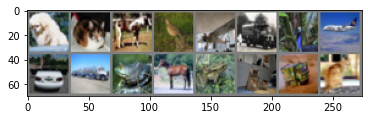

dog   cat   horse bird  plane truck bird  plane car   truck frog  horse frog  cat   truck cat  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    print(img.shape)
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
gd_hist = []
for epoch in range(16):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        gd_hist.append(loss.item())
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.171
[2,  2000] loss: 1.609
[3,  2000] loss: 1.407
[4,  2000] loss: 1.294
[5,  2000] loss: 1.212
[6,  2000] loss: 1.140
[7,  2000] loss: 1.076
[8,  2000] loss: 1.031
[9,  2000] loss: 0.974
[10,  2000] loss: 0.932
[11,  2000] loss: 0.899
[12,  2000] loss: 0.855
[13,  2000] loss: 0.824
[14,  2000] loss: 0.793
[15,  2000] loss: 0.760
[16,  2000] loss: 0.738
Finished Training


In [19]:
'''from torchsummary import summary
summary(net.to('cuda'), (3,32,32))'''

"from torchsummary import summary\nsummary(net.to('cuda'), (3,32,32))"

In [7]:
from Optimizer.optimizer import Optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = Optimizer(net, 8, inertial_weight=0.1, self_conf=0.01, swarm_conf=0.01, norm=True)

In [9]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = Optimizer(net, 2, inertial_weight=0.9, self_conf=0.01, swarm_conf=0.01, norm=True)
loss_history = []
best_history = []
net.train()
for epoch in range(2):  # loop over the dataset multiple times
    p_lose = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        loss = optimizer.step(inputs, labels, criterion)
        p_lose = optimizer.pso.costs
        # print statistics
        if i % 1000 == 999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {loss:.3f}')
            print(optimizer.pso.costs)
            running_loss = 0.0
            correct = 0
            total = 0

        loss_history.append(p_lose)
        best_history.append(loss)
print('Finished Training')


[1,  1000] loss: 1.951
[1.9508613  1.95114463]
[1,  2000] loss: 1.681
[1.68061037 1.68088329]
[1,  3000] loss: 1.577
[1.57692919 1.5791559 ]
[2,  1000] loss: 1.493
[1.49402954 1.49490617]
[2,  2000] loss: 1.472
[1.48175009 1.48209594]
[2,  3000] loss: 1.445
[1.45062163 1.45453944]
Finished Training


In [11]:
loss_history = np.array(loss_history)
best_history = np.array(best_history)
#print((loss_history.shape))
gd_mean = []
for i in range(len(gd_hist)):
    if i> 1000:
        gd_mean.append(np.mean(gd_hist[i-1000:i]))
    elif i > 1:
        gd_mean.append(np.mean(gd_hist[:i]))
    elif i==0:
        gd_mean.append((gd_hist[i]))
print(len(gd_mean))

NameError: name 'gd_hist' is not defined

In [12]:
%matplotlib notebook
for i in range(loss_history.shape[1]):
    plt.plot(range(loss_history.shape[0]),loss_history[:, i], label=str(i), linestyle='--')
plt.plot(range(len(best_history)), best_history, label='PSO')
#plt.plot(range(len(gd_mean)), gd_mean, label='GD')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')